In [1]:
import pandas as pd
from konlpy.tag import Hannanum, Okt
from collections import Counter
import pytagcloud, re
from IPython.display import Image

pygame 2.0.1 (SDL 2.0.14, Python 3.7.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


#### 손흥민 뉴스 키워드를 수집한 데이터 읽기

In [2]:
df = pd.read_csv('son.csv')
df.head(10)

,title,description
0,'햄스트링 부상' <b>손흥민</b> 한일전 출격 여부 &quot;주말 결정될 듯&...,"축구협회 &quot;토트넘, 몸상태 면밀 체크 중&quot;…그라운드 복귀 시점 '..."
1,다친 <b>손흥민</b>에 “XX 같은 XX”… BJ 감스트 결국 사과,인기 축구 유튜버 겸 아프리카TV 감스트(본명 김인직·31)가 <b>손흥민</b>이...
2,"<b>손흥민</b> 한일전 차출, 소탐대실 될라",파울루 벤투 축구국가대표팀 감독이 25일 일본에서 열리는 한일전에 <b>손흥민</b...
3,'햄스트링 부상' <b>손흥민</b> 한일전 출격 여부 &quot;주말 결정될 듯&...,축구대표팀 주장 <b>손흥민</b>의 한일전 출격 여부가 오는 주말에야 결정될 전망...
4,"큰 부상 피한 <b>손흥민</b>, 한일전 출전 여부 이르면 내일 결론",쓰러진 <b>손흥민</b>(29·토트넘)의 부상이 우려한 것보다 심하지 않은 것 같...
5,"감스트, 부상 <b>손흥민</b>에 “XX 같은 XX” 욕설…논란일자 사과",당한 <b>손흥민</b>을 향해 욕설을 쏟아내 논란이 일자 사과했다. 감스트는 16...
6,축구협회 &quot;<b>손흥민</b> 한일전 합류 여부 19~20일께 결정&quot;,<b>손흥민</b>(29·토트넘)의 한일전 합류 여부가 오는 주말 결정될 것으로 보...
7,"“<b>손흥민</b> 부상 심각하지 않아”…협회 &amp; 토트넘, 주말 이전 한일...",10년 만에 열릴 친선 한일전에 나설 축구국가대표팀 명단에 이름을 올린 <b>손흥민...
8,"감스트, 부상당한 <b>손흥민</b>에 욕설했다 사과 &quot;선수께 죄송&quot;",부상당한 <b>손흥민</b>(토트넘)을 향해 욕설했다 사과했다. 지난 16일 감스트...
9,&quot;부상 심각하지 않다&quot; 英 매체 &quot;<b>손흥민</b> 이...,"<b>손흥민</b>(29, 토트넘 핫스퍼)의 부상이 심각하지 않은 것으로 알려졌다...."


In [3]:
# 결측치 확인.
df.isna().sum()

title          0
description    1
dtype: int64

In [4]:
# 결측치 제거.
df.dropna(inplace=True)
df.isna().sum()

title          0
description    0
dtype: int64

#### 한글 정제

In [5]:
# text 정제 함수 : 한글 이외의 문자는 전부 제거.
def text_cleaning(text) :
    
    # 한글 정규식 정의(띄어쓰기, ㄱ ~ ㅣ, 가 ~ 힣)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    
    # 정제.(정규식에 해당하지 않는 글자는 길이가 0은 문자열로 변환.)
    result = hangul.sub('', text)
    return result

In [6]:
# Test.
test = df['description'][0]
print(test)
print('-'*135)
print(text_cleaning(test))

축구협회 &quot;토트넘, 몸상태 면밀 체크 중&quot;…그라운드 복귀 시점 '안갯속' <b>손흥민</b>(29·토트넘)의 한일전 출격 여부가 오는 주말에야 결정될 전망이다. 17일 대한축구협회(KFA)에 따르면 토트넘은 현재 <b>손흥민</b>의 부상 부위 등 몸... 
---------------------------------------------------------------------------------------------------------------------------------------
축구협회 토트넘 몸상태 면밀 체크 중그라운드 복귀 시점 안갯속 손흥민토트넘의 한일전 출격 여부가 오는 주말에야 결정될 전망이다 일 대한축구협회에 따르면 토트넘은 현재 손흥민의 부상 부위 등 몸 


In [7]:
# 한글 정제.
df['title']       = df['title'].apply(lambda x : text_cleaning(x))
df['description'] = df['description'].apply(lambda x : text_cleaning(x))
df.head(10)

,title,description
0,햄스트링 부상 손흥민 한일전 출격 여부 주말 결정될 듯,축구협회 토트넘 몸상태 면밀 체크 중그라운드 복귀 시점 안갯속 손흥민토트넘의 한일전...
1,다친 손흥민에 같은 감스트 결국 사과,인기 축구 유튜버 겸 아프리카 감스트본명 김인직가 손흥민이 뛰는 토트넘과 아스널의 ...
2,손흥민 한일전 차출 소탐대실 될라,파울루 벤투 축구국가대표팀 감독이 일 일본에서 열리는 한일전에 손흥민토트넘을 차출한...
3,햄스트링 부상 손흥민 한일전 출격 여부 주말 결정될 듯,축구대표팀 주장 손흥민의 한일전 출격 여부가 오는 주말에야 결정될 전망입니다 대한축...
4,큰 부상 피한 손흥민 한일전 출전 여부 이르면 내일 결론,쓰러진 손흥민토트넘의 부상이 우려한 것보다 심하지 않은 것 같다는 현지 보도가 나왔...
5,감스트 부상 손흥민에 같은 욕설논란일자 사과,당한 손흥민을 향해 욕설을 쏟아내 논란이 일자 사과했다 감스트는 일 유튜브에 죄송합...
6,축구협회 손흥민 한일전 합류 여부 일께 결정,손흥민토트넘의 한일전 합류 여부가 오는 주말 결정될 것으로 보인다 대한축구협회 관계...
7,손흥민 부상 심각하지 않아협회 토트넘 주말 이전 한일전 차출 결론,년 만에 열릴 친선 한일전에 나설 축구국가대표팀 명단에 이름을 올린 손흥민토트넘의 ...
8,감스트 부상당한 손흥민에 욕설했다 사과 선수께 죄송,부상당한 손흥민토트넘을 향해 욕설했다 사과했다 지난 일 감스트는 자신의 유튜브 채널...
9,부상 심각하지 않다 매체 손흥민 이르면 일 복귀,손흥민 토트넘 핫스퍼의 부상이 심각하지 않은 것으로 알려졌다 영국 풋볼런던은 일한국...


#### 형태소 분석

In [8]:
# 말뭉치 생성.(모든 문장을 하나로 합치는 작업.)
title_corpus       = ''.join(df['title'].tolist())
description_corpus = ''.join(df['description'].tolist())
# print(title_corpus)
# print(description_corpus)

In [9]:
# 형태소 분석.
tagger = Okt()
title_nouns = tagger.nouns(title_corpus)
description_nouns = tagger.nouns(description_corpus)

# print(title_nouns)
# print(description_nouns)

In [10]:
# 단어들의 빈도수 계산.
title_count = Counter(title_nouns)
description_count = Counter(description_nouns)
# print(title_count)
# print(description_count)

#### 키워드 다듬기
- 한글자인 데이터 삭제.
- 불용어 데이터 삭제.

In [11]:
# 불용어 제거 .
# 불용어(stopwords) : 분석시 필요하지 않는 단어들을 의미.
# 불용어 읽기.
with open('data10/korean_stopwords.txt', encoding='utf-8') as fp :
    stopwords = fp.readlines()

# \n 제거.
stopwords = [x.strip() for x in stopwords]
# stopwords

In [12]:
# 1글자를 제외한 나머지를 새롭게 담기.
title_dict = {}
description_dict = {}

for key in title_count :
    if len(key) > 1 :
        title_dict[key] = title_count[key]

for key in description_count :
    if len(key) > 1 :
        description_dict[key] = description_count[key]
        
remove_title_count = Counter(title_dict)
remove_description_count = Counter(description_dict)

# 불용어를 제외한 나머지만 담기.
title_dict = {}
for key in remove_title_count :
    if key not in stopwords :
        title_dict[key] = remove_title_count[key]
        
description_dict = {}
for key in remove_description_count :
    if key not in stopwords :
        description_dict[key] = remove_description_count[key]

remove_title_count = Counter(title_dict)
remove_description_count = Counter(description_dict)

# 손흥민에 관한 뉴스이므로 손흥민이라는 키워드 제거.
del remove_title_count['손흥민']
del remove_description_count['손흥민']

In [13]:
# 최종 제목 내용 개수.
print(len(remove_title_count))
print(len(remove_description_count))

956
1648


#### Word Cloud 시각화

In [14]:
# title에서 빈도수가 많은 100개의 단어를 추출.
rank_title_tags = remove_title_count.most_common(100)

# Word Cloud를 위한 단어사전을 생성.
title_taglist = pytagcloud.make_tags(rank_title_tags)

# Word Cloud 이미지를 생성.
pytagcloud.create_tag_image(title_taglist, 'son_title.jpg', size=(800, 600), fontname='NanumGothic', rectangular=False)

In [15]:
# description에서 빈도수가 많은 100개의 단어를 추출.
rank_description_tags = remove_description_count.most_common(100)

# Word Cloud를 위한 단어 사전을 생성.
description_taglist = pytagcloud.make_tags(rank_description_tags)

# Word Cloud 이미지를 생성.
pytagcloud.create_tag_image(description_taglist, 'son_description.jpg', size=(800, 600), fontname='NanumGothic', rectangular=False)

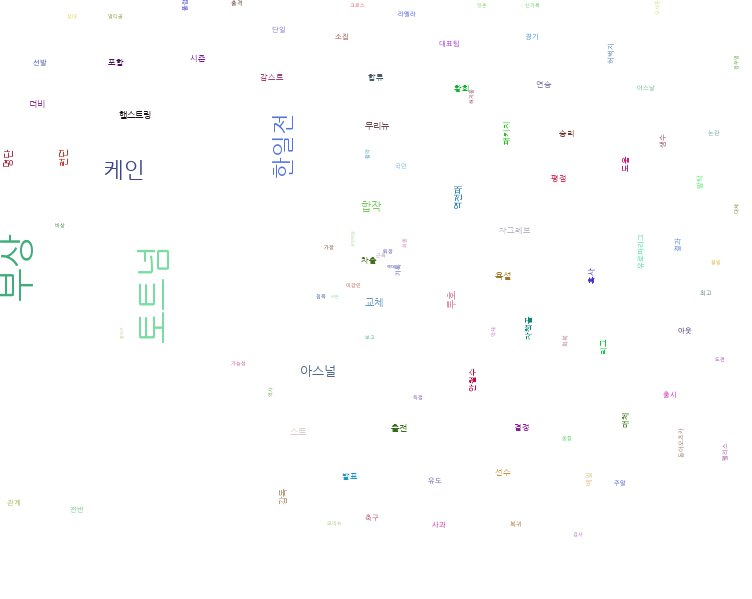

In [16]:
Image(filename='son_title.jpg')

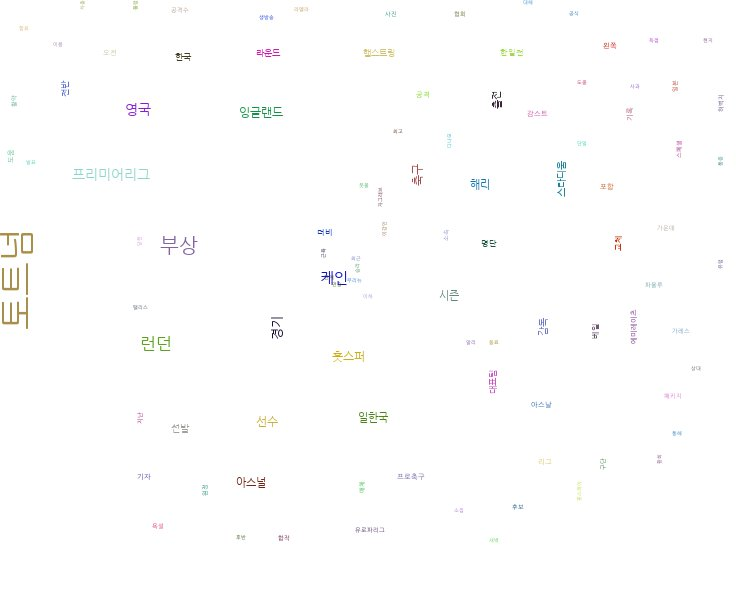

In [17]:
Image(filename='son_description.jpg')